<a href="https://colab.research.google.com/github/Karim-Anwar/masterProject/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personal Information
Name: **Karim Anwar**

StudentID: **13994565**

Email: [**karim.anwar@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **23.02.2023**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png)

In [30]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy

### Data Loading

In [3]:
# Load your data here
daylight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_450400_TL161_daylight.csv', names = ['seq', 'time', 'value'])
roomlight_csv = pd.read_csv('/content/drive/MyDrive/exploratory-data-analysis/UvA_LAB42_450400_TL162_roomlight.csv', names = ['seq', 'time', 'value'])

### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

In [4]:
# Also don't forget to comment your code
# This way it's also easier to spot thought errors along the way
daylight_csv.head(5)

,seq,time,value
0,1000152327,2022-11-03 11:52:00,5.0
1,1000152328,2022-11-03 11:53:00,5.0
2,1000152329,2022-11-03 11:54:00,5.0
3,1000152330,2022-11-03 11:55:00,5.0
4,1000152331,2022-11-03 11:56:00,5.0


In [5]:
roomlight_csv.head(5)

,seq,time,value
0,1000152327,2022-11-03 11:52:00,80
1,1000152328,2022-11-03 11:53:00,80
2,1000152329,2022-11-03 11:54:00,80
3,1000152330,2022-11-03 11:55:00,80
4,1000152331,2022-11-03 11:56:00,80


In [6]:
daylight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   seq     134759 non-null  int64  
 1   time    134759 non-null  object 
 2   value   134759 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
roomlight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   seq     134759 non-null  int64 
 1   time    134759 non-null  object
 2   value   134759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.1+ MB


In [8]:
print(min(daylight_csv['value']))
print(max(daylight_csv['value']))

0.0
100.0


In [9]:
print(min(roomlight_csv['value']))
print(max(roomlight_csv['value']))

0
100


Since we dont really have a discription what value correspond too we can now assume that sicne they are from 0 to 100 they work like a percentage and we can takle that into account as it is light intensity.

In [11]:
print((daylight_csv['value'].mean()))

12.47877042228222


In [12]:
print((roomlight_csv['value'].mean()))

12.675813860298755


In [13]:
print("first instance: " + daylight_csv['time'][0], " latest instance: " + daylight_csv['time'][-1:])

first instance: 2022-11-03 11:52:00 134758     latest instance: 2023-02-28 16:08:00
Name: time, dtype: object


In [ ]:
daylight_csv.head(60)

In [23]:
daylight_csv['time'].dtype

dtype('O')

In [28]:
daylight_csv['time'] = pd.to_datetime(daylight_csv['time'])

In [29]:
daylight_csv['time'].dtype

dtype('<M8[ns]')

In [76]:
dist_day = daylight_csv.groupby([daylight_csv['time'].dt.hour]).value.mean()

In [39]:
roomlight_csv['time'] = pd.to_datetime(roomlight_csv['time'])

In [53]:
dist_room = roomlight_csv.groupby([roomlight_csv['time'].dt.hour]).value.mean()
print(dist_room)

time
0      0.000000
1      0.000000
2      0.017737
3      0.035511
4      0.035939
5      0.000000
6      1.401434
7      9.641577
8      9.050360
9     11.372760
10    21.921147
11    24.113120
12    26.794803
13    28.019152
14    30.148936
15    31.264409
16    31.433654
17    29.021277
18    19.336762
19    11.524823
20     7.482654
21     5.904255
22     3.897163
23     1.517730
Name: value, dtype: float64


In [72]:
df_dist_room = dist_room.reset_index()

In [73]:
df_dist_room

,time,value
0,0,0.000000
1,1,0.000000
2,2,0.017737
3,3,0.035511
4,4,0.035939
5,5,0.000000
6,6,1.401434
7,7,9.641577
8,8,9.050360
9,9,11.372760


<BarContainer object of 24 artists>

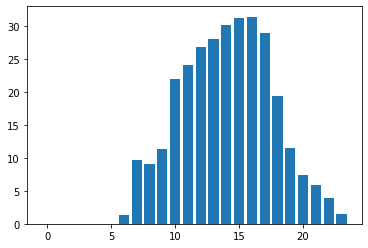

In [75]:
plt.bar(df_dist_room['time'],df_dist_room['value'])

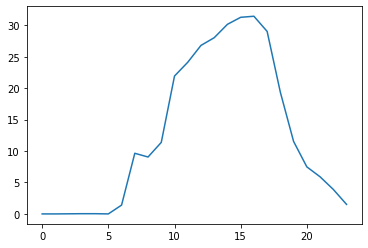

In [80]:
plt.plot(df_dist_room['time'],df_dist_room['value'])

In [77]:
df_dist_day = dist_day.reset_index()

<BarContainer object of 24 artists>

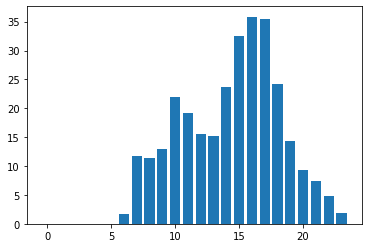

In [78]:
plt.bar(df_dist_day['time'],df_dist_day['value'])

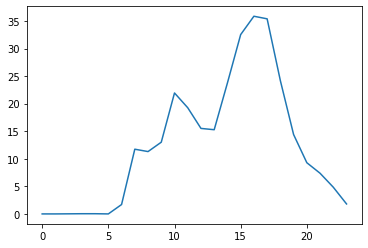

In [79]:
plt.plot(df_dist_day['time'],df_dist_day['value'])

In [99]:
daylight_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134759 entries, 0 to 134758
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   seq     134759 non-null  int64         
 1   time    134759 non-null  datetime64[ns]
 2   value   134759 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.1 MB


In [90]:
daylight_csv_hour = daylight_csv.drop(columns=['seq']).set_index('time').resample('1H').mean()

In [98]:
daylight_csv_hour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2814 entries, 2022-11-03 11:00:00 to 2023-02-28 16:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   2250 non-null   float64
dtypes: float64(1)
memory usage: 44.0 KB


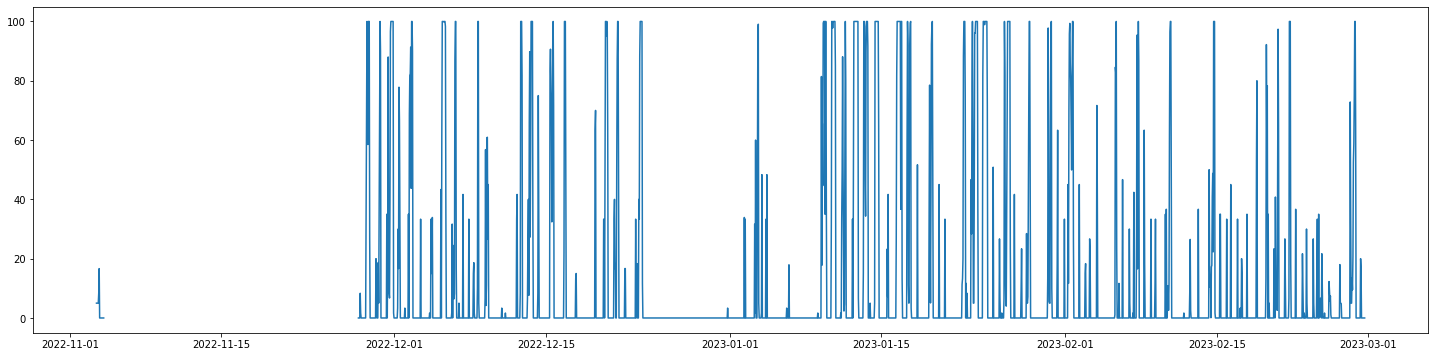

In [108]:
plt.figure(figsize=(25,6))

plt.plot(daylight_csv_hour)

In [93]:
roomlight_csv_hour = roomlight_csv.drop(columns=['seq']).set_index('time').resample('1H').mean()

In [110]:
roomlight_csv_hour.tail(30)

,value
time,
2023-02-27 11:00:00,80.000000
2023-02-27 12:00:00,34.666667
2023-02-27 13:00:00,80.000000
2023-02-27 14:00:00,80.000000
2023-02-27 15:00:00,80.000000
2023-02-27 16:00:00,80.000000
2023-02-27 17:00:00,80.000000
2023-02-27 18:00:00,80.000000
2023-02-27 19:00:00,80.000000


In [111]:
daylight_csv_hour.tail(30)

,value
time,
2023-02-27 11:00:00,5.001806
2023-02-27 12:00:00,13.384486
2023-02-27 13:00:00,9.496115
2023-02-27 14:00:00,20.869704
2023-02-27 15:00:00,52.581164
2023-02-27 16:00:00,59.008799
2023-02-27 17:00:00,75.405541
2023-02-27 18:00:00,100.000000
2023-02-27 19:00:00,100.000000


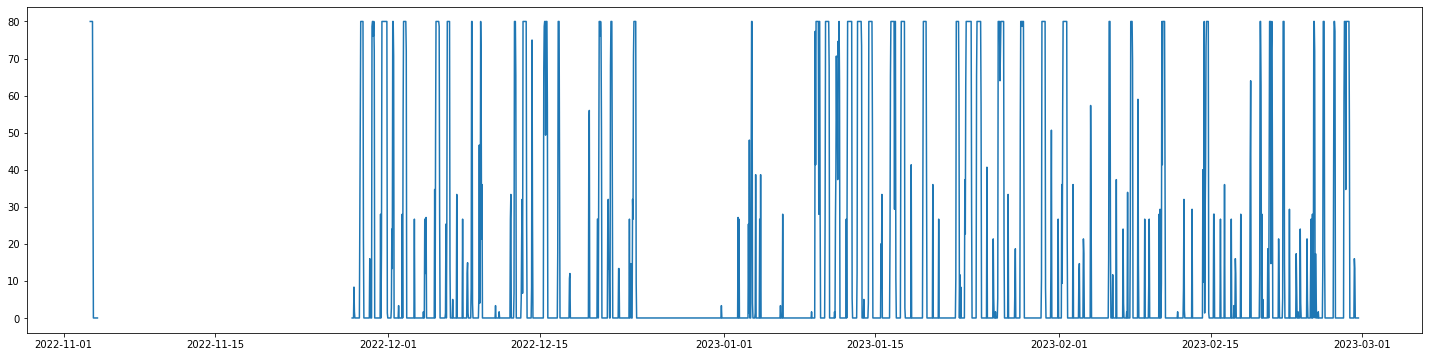

In [106]:
plt.figure(figsize=(25,6))
plt.plot(roomlight_csv_hour)

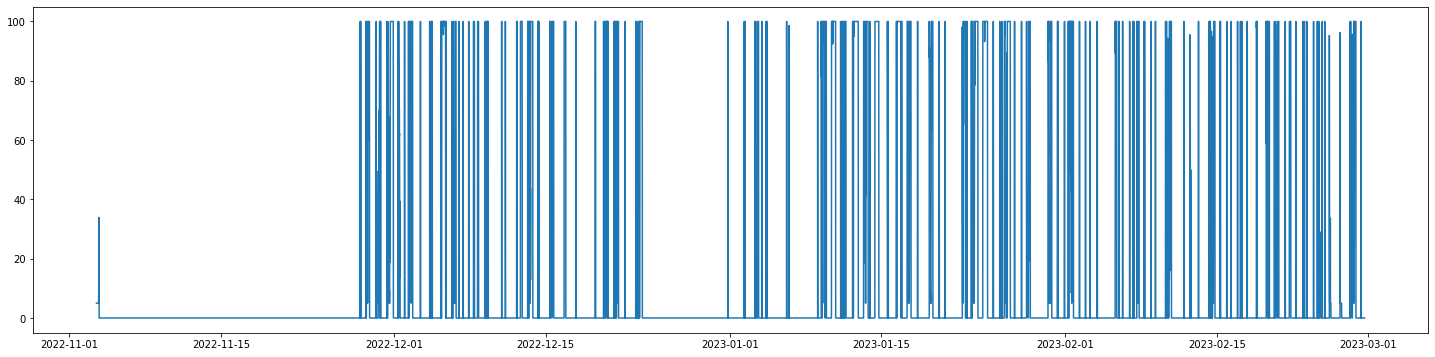

In [105]:
plt.figure(figsize=(25,6))
plt.plot(daylight_csv['time'], daylight_csv['value'])

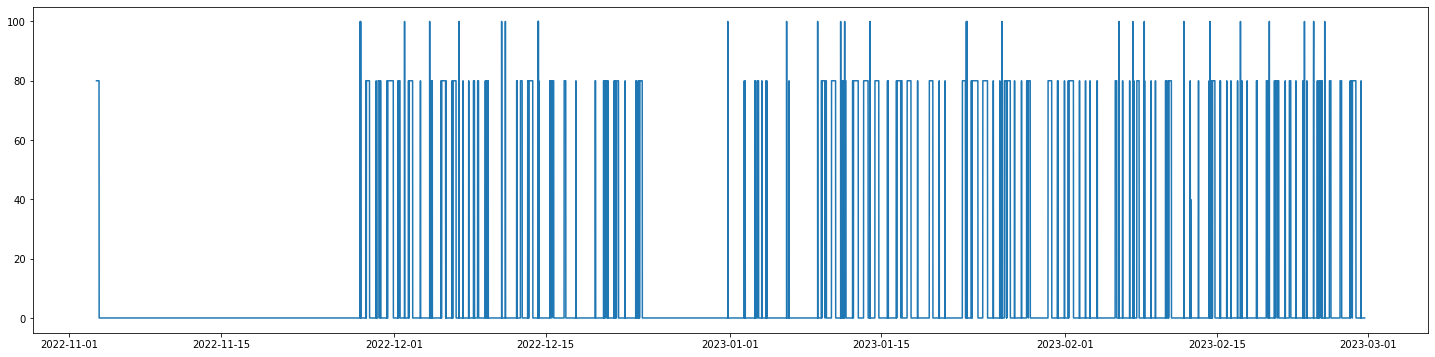

In [107]:
plt.figure(figsize=(25,6))
plt.plot(roomlight_csv['time'], roomlight_csv['value'])

### Analysis 2: 

We have the read values from each minute since 2022-11-03 till current time today (when data got extracted) which is too many instances, we will average the light intensity for per hour and look for correlation between outdoor intesity ie.daylight and indoor intensity ie.roomlight .

### Analysis n:

In [ ]:
# ...